In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('data/Housing/train.csv')
test=pd.read_csv('data/Housing/test.csv')
sample_submission=pd.read_csv('data/Housing/sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Some first exploration of features

In [6]:
lot_price=train[['LotArea','SalePrice']]

In [7]:
lot_price[lot_price.isnull().any(axis=1)]

,LotArea,SalePrice


C:\Users\Josh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


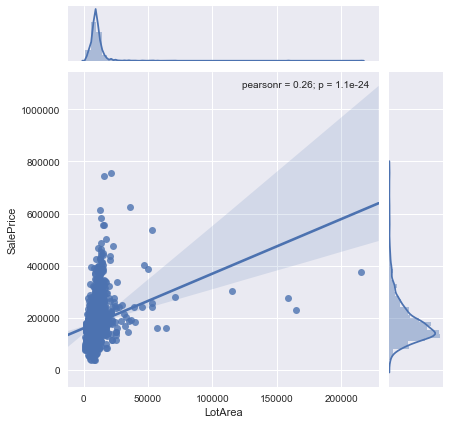

In [15]:
sns.jointplot(x='LotArea',y='SalePrice', data=train, kind="reg")

C:\Users\Josh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


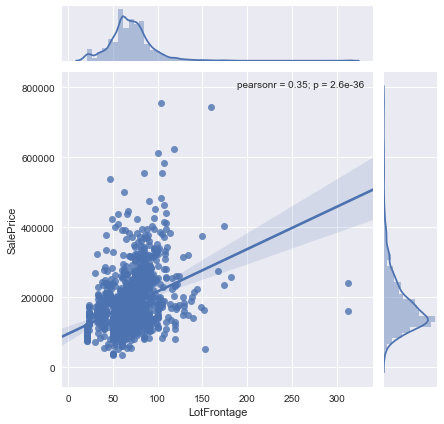

In [16]:
sns.jointplot(x='LotFrontage',y='SalePrice', data=train, kind="reg")

C:\Users\Josh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


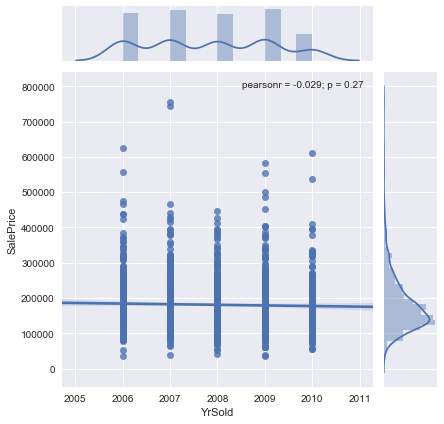

In [17]:
sns.jointplot(x='YrSold',y='SalePrice', data=train, kind="reg")

C:\Users\Josh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


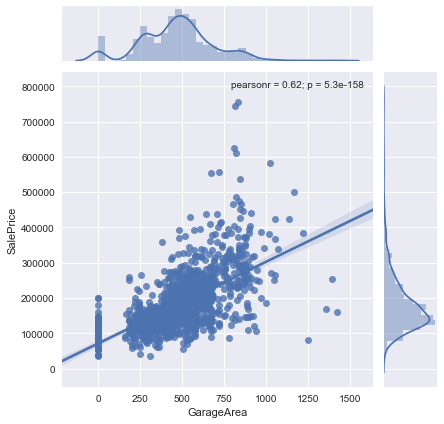

In [33]:
sns.jointplot(x='GarageArea',y='SalePrice', data=train, kind="reg")

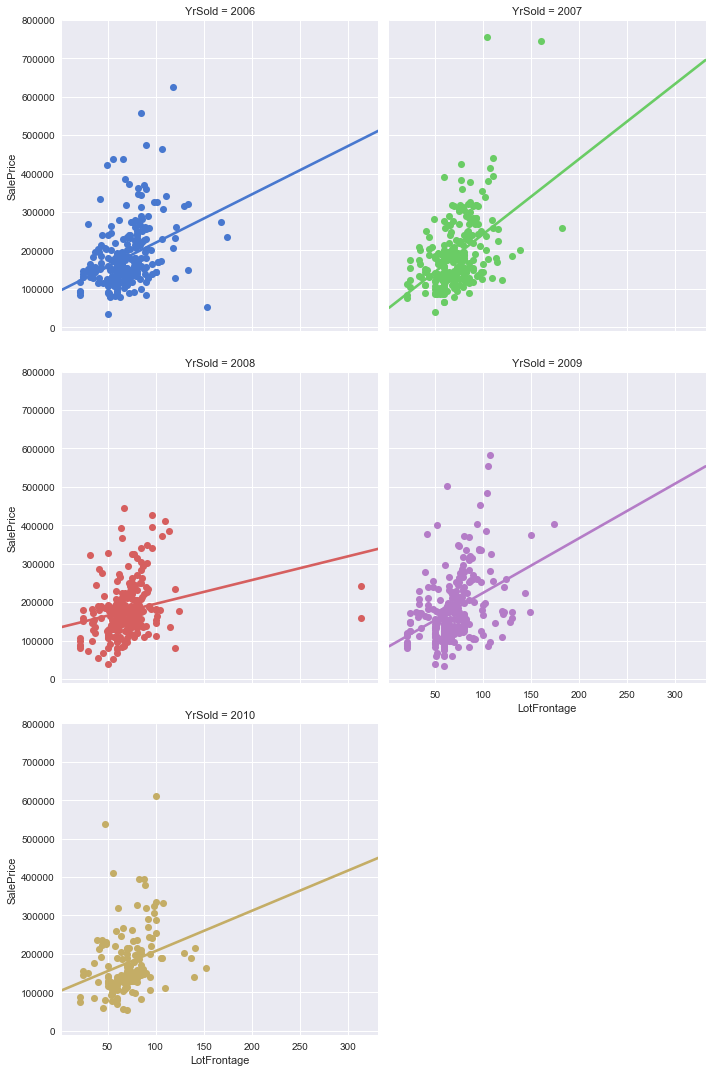

In [27]:
sns.lmplot(x="LotFrontage", y="SalePrice", col="YrSold", hue="YrSold", data=train,
           col_wrap=2, ci=None, palette="muted",
           scatter_kws={"s": 50, "alpha": 1})

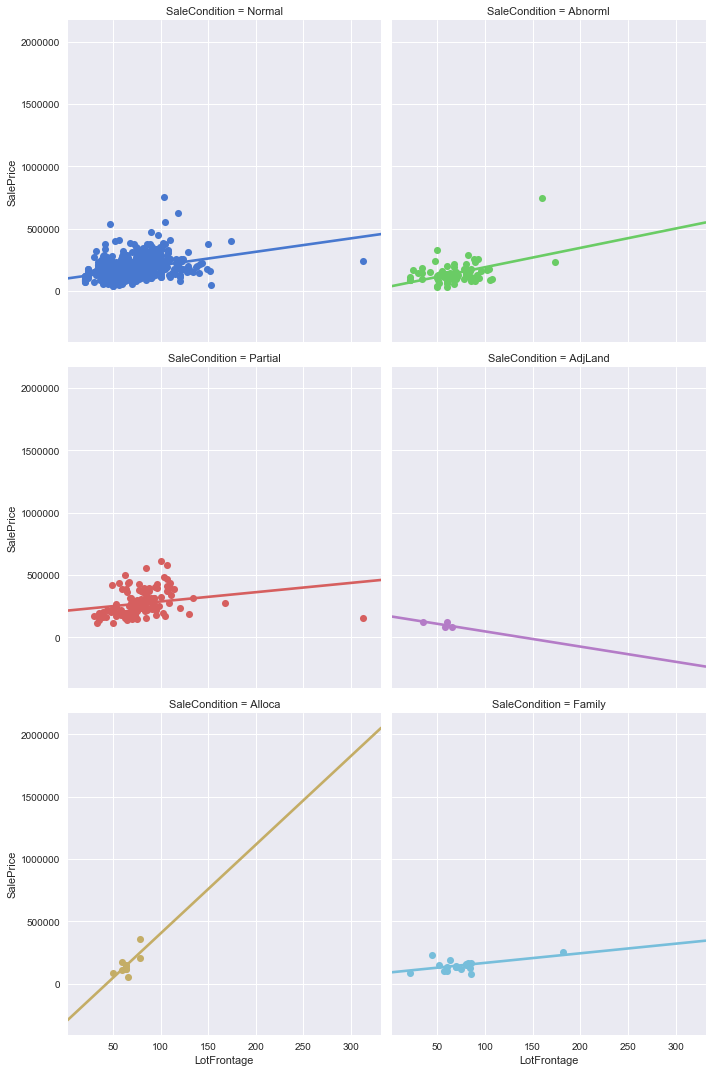

In [29]:
sns.lmplot(x="LotFrontage", y="SalePrice", col="SaleCondition", hue="SaleCondition", data=train,
           col_wrap=2, ci=None, palette="muted",
           scatter_kws={"s": 50, "alpha": 1})

In [30]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [34]:
x_train=train[['LotArea','GarageArea']]
y_train=train['SalePrice']

In [56]:
x_test=test[['LotArea','GarageArea']]

In [37]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
reg.score(x_train,y_train)

0.41235186539832547

In [57]:
x_test[x_test.isnull().any(axis=1)]

,LotArea,GarageArea
1116,9060,NaN


In [58]:
x_test=x_test.fillna(0) #Fill Null garage area with 0

In [59]:
y_pred=reg.predict(x_test)

In [62]:
my_submission=pd.DataFrame(y_pred)

In [64]:
my_submission['Id']=test['Id']

In [55]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [65]:
my_submission.head()

,0,Id
0,239139.365085,1461
1,149989.502181,1462
2,187042.047304,1463
3,179591.089679,1464
4,181359.656407,1465


In [66]:
my_submission.columns=['SalePrice','Id']

In [68]:
my_submission=my_submission[['Id','SalePrice']]

In [70]:
my_submission.head()

,Id,SalePrice
0,1461,239139.365085
1,1462,149989.502181
2,1463,187042.047304
3,1464,179591.089679
4,1465,181359.656407


In [72]:
my_submission.to_csv('lot-garagearea-linear-1', index=False)